In [1]:
import os
import json
import numpy as np
import PythonModel3dTracker.Paths as Paths
%matplotlib inline
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Loading Result Metrics from json file.
results_files = ['v6_metrics.json']
input_dir = os.path.join(Paths.results, "Human_tracking/Levmar/mhad_quats")
results_metrics = []
for rf in results_files:
    results_json = os.path.join(input_dir, rf)
    with open(results_json, 'r') as fp:
        results_metrics.append(json.load(fp))
print 'Loaded metrics from', len(results_metrics), 'files.'
for rf, rm in zip(results_files, results_metrics): 
    print rf, len(rm)

Loaded metrics from 1 files.
v6_metrics.json 4069


In [47]:
#Gathering metrics staticstics.
all_params = []
dids = {}
all_params_str = {}
for i,rm in enumerate(results_metrics):
    for f,data in rm.items():     
        cur_did = str(data["did"])
        cur_params = data["parameters"]
        cur_params_str = str([d for _,d in data["parameters"].items()])
        if i>0:
            if Cth != data["dist_cutoofs"]:
                print i, 'Warning success thresholds do not match.'
        Cth = data["dist_cutoofs"]
        if cur_did not in dids: dids[cur_did] = 0
        dids[cur_did] += 1
        if cur_params not in all_params: all_params.append(cur_params)      
        if cur_params_str not in all_params_str: all_params_str[cur_params_str] = [0,[]]
        all_params_str[cur_params_str][0] += 1
        if cur_did not in all_params_str[cur_params_str][1]: 
            all_params_str[cur_params_str][1] += [cur_did]


            
print 'Success ratio thresholds:', Cth
            
print 'results number per dataset:'
for d,n in dids.items():
    print d, n
            
print 'results number per parameter set:'
for p, n in all_params_str.items():
    print p, "N:",n[0],"Ndids:", len(n[1])
    


        
          


Success ratio thresholds: [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
results number per dataset:
mhad_s03_a04 185
mhad_s06_a04 185
mhad_s12_a04 185
mhad_s11_a04 185
mhad_s08_a04 185
mhad_s01_a04 185
mhad_s09_a10 185
mhad_s09_a11 185
mhad_s05_a04 185
mhad_s07_a04 185
mhad_s02_a04 185
mhad_s04_a04 185
mhad_s09_a09 184
mhad_s09_a08 185
mhad_s09_a03 185
mhad_s09_a02 185
mhad_s09_a01 185
mhad_s09_a07 185
mhad_s09_a06 185
mhad_s09_a05 185
mhad_s09_a04 185
mhad_s10_a04 185
results number per parameter set:
[[0.0, 0.15], 20, 20, False, True] N: 110 Ndids: 22
[[0.05, 0.3], 10, 10, True, False] N: 110 Ndids: 22
[[0.0, 0.15], 10, 10, False, False] N: 110 Ndids: 22
[[0.05, 0.15], 20, 20, True, True] N: 110 Ndids: 22
[[0.05, 0.3], 10, 10, False, True] N: 110 Ndids: 22
[[0.05, 0.15], 10, 10, True, False] N: 109 Ndids: 22
[[0.05, 0.3], 20, 20, True, True] N: 110 Ndids: 22
[[0.0, 0.15], 10, 10, True, True] N: 110 Ndids: 22
[[0.05, 0.15], 20, 20, False, True] N: 110 Ndids: 22
[[0.0, 0.0], 1, 1, Fal

In [48]:
#computing best performing parameter set for each dataset.

    
# Seq dist metric.
min_did_error = []
for did in dids:
    cur_did_errors = []
    cur_filenames = []
    cur_params = []
    for rm in results_metrics:
        for f,data in rm.items():        
            cur_did = str(data["did"])        
            if cur_did == did: 
                cur_did_errors.append(data["seq_dist_corr"])
                cur_filenames.append(f)
                cur_params.append(data["parameters"])
    min_index = np.argmin(cur_did_errors)
    min_filename = cur_filenames[min_index]
    min_params = cur_params[min_index]
    
    #for f,e,p in  zip(cur_filenames, cur_did_errors, cur_params):
    #    if (p['ransac'] == [0., 0.15]) and p['filter_occluded'] == False:
    #        print f,e
        
    print did, min(cur_did_errors), 'particles:', min_params['n_particles'], 'ransac:', min_params['ransac'], \
    'filter(o/h):', min_params['filter_occluded'], min_params['filter_history']
    min_did_error.append(min(cur_did_errors))
print 'Average error:', np.average(np.array(min_did_error))

# Success metric.
max_did_succ = []
for did in dids:
    cur_did_succ = []
    cur_filenames = []
    cur_params = []
    for rm in results_metrics:
        for f,data in rm.items():
            cur_did = str(data["did"])        
            if cur_did == did: 
                cur_did_succ.append(data["seq_success_ratio_j"][2])
                cur_filenames.append(f)
                cur_params.append(data["parameters"])
    max_index = np.argmax(cur_did_succ)
    max_filename = cur_filenames[max_index]
    min_params = cur_params[max_index]
    #for f,c in  zip(cur_filenames, cur_did_succ):
    #    print f,c
        
    print did, max(cur_did_succ), 'particles:', min_params['n_particles'], 'ransac:', min_params['ransac'], \
    'filter(o/h):', min_params['filter_occluded'], min_params['filter_history']
    max_did_succ.append(max(cur_did_succ))
print 'Average success rate:', np.average(np.array(max_did_succ))
    

mhad_s03_a04 58.2346546421 particles: 5 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s06_a04 58.1589336307 particles: 5 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s12_a04 80.6555200204 particles: 5 ransac: [0.0, 0.15] filter(o/h): True False
mhad_s11_a04 65.5830508261 particles: 5 ransac: [0.0, 0.15] filter(o/h): True True
mhad_s08_a04 55.6688652755 particles: 5 ransac: [0.05, 0.15] filter(o/h): False True
mhad_s01_a04 62.9232874939 particles: 5 ransac: [0.0, 0.15] filter(o/h): True False
mhad_s09_a10 62.813025467 particles: 1 ransac: [0.0, 0.0] filter(o/h): False False
mhad_s09_a11 58.4152470055 particles: 5 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s05_a04 57.8109671723 particles: 5 ransac: [0.05, 0.15] filter(o/h): True True
mhad_s07_a04 81.5795029022 particles: 10 ransac: [0.05, 0.15] filter(o/h): False True
mhad_s02_a04 45.8752410211 particles: 5 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s04_a04 67.2242442009 particles: 5 ransac: [0.05, 0.15] filter(o/h): F

 42.8125384153 particles: 1 ransac: [0.0, 0.0] filter(o/h): False False
mhad_s09_a05 50.3122951541 particles: 5 ransac: [0.05, 0.15] filter(o/h): False True
mhad_s09_a04 93.4595628253 particles: 10 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s10_a04 54.1100391302 particles: 5 ransac: [0.0, 0.15] filter(o/h): False True
Average error: 65.2953851135
mhad_s03_a04 0.269841269841 particles: 20 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s06_a04 0.357492997199 particles: 20 ransac: [0.0, 0.15] filter(o/h): True True
mhad_s12_a04 0.194920634921 particles: 20 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s11_a04 0.305704534373 particles: 20 ransac: [0.05, 0.3] filter(o/h): True True
mhad_s08_a04 0.233418367347 particles: 20 ransac: [0.05, 0.3] filter(o/h): False True
mhad_s01_a04 0.208683473389 particles: 10 ransac: [0.05, 0.3] filter(o/h): True True
mhad_s09_a10 0.228462377317 particles: 10 ransac: [0.05, 0.15] filter(o/h): True True
mhad_s09_a11 0.244444444444 particles: 5 ransa

 0.208333333333 particles: 5 ransac: [0.0, 0.15] filter(o/h): False True
mhad_s09_a01 0.23602484472 particles: 20 ransac: [0.05, 0.3] filter(o/h): True True
mhad_s09_a07 0.286394557823 particles: 1 ransac: [0.0, 0.0] filter(o/h): False False
mhad_s09_a06 0.272361647362 particles: 1 ransac: [0.0, 0.0] filter(o/h): False False
mhad_s09_a05 0.225998463902 particles: 20 ransac: [0.0, 0.15] filter(o/h): True True
mhad_s09_a04 0.218794494542 particles: 20 ransac: [0.05, 0.15] filter(o/h): False True
mhad_s10_a04 0.205061494797 particles: 20 ransac: [0.0, 0.15] filter(o/h): True True
Average success rate: 0.229633812368


In [71]:
# Computing average error for each parameter set.
dist_errors = ['seq_dist', 'seq_dist_corr']
succ_errors = ['seq_success_ratio_f','seq_success_ratio_j',
               'seq_success_ratio_f_corr','seq_success_ratio_j_corr']
errors = dist_errors + succ_errors

selected_error = 'seq_success_ratio_j_corr'
selected_error_number = 0

error_tuples = {}
for e in errors:
    error_tuples[e] = []
    if e in dist_errors: 
        sorting_reverse = False
        error_nums = 1
    else: 
        sorting_reverse = True
        error_nums = len(Cth)
    for n in range(error_nums):
        params_error = [[] for i in range(len(all_params))]
        for rm in results_metrics:
            for f,data in rm.items():
                cur_error = data[e]
                cur_params = data["parameters"]
                idx = all_params.index(cur_params)
                if e in dist_errors:
                    params_error[idx].append(cur_error)
                else:
                    params_error[idx].append(cur_error[n])
        cur_error_tuple = [(p, np.average(err), np.std(err), err) for p,err in zip(all_params, params_error)]
        cur_error_tuple = sorted(cur_error_tuple, key=lambda t: t[1], reverse=sorting_reverse)
        #print e, 'appending', n
        error_tuples[e].append(cur_error_tuple)
        

baselines = []
filter_o = {}
filter_h = {}
filter_oh = {}
particles_res = {}
ransac_res = {}

Np = []
R = []

for t in error_tuples[selected_error][selected_error_number]:
    p = t[0]
    n = p['n_particles']
    r = tuple(p['ransac'])
    fo = p['filter_occluded']
    fh = p['filter_history']
    #print 'particles:', p['n_particles'], 'ransac:', p['ransac'], \
    #'filter(o/h):', p['filter_occluded'], p['filter_history'], t[1], t[2], len(t[3])
        
    if (n == 1) and (fo == False) and (fh == False):
        baselines.append(t)
       
    if fo not in filter_o: filter_o[fo] = []
    if fh not in filter_h: filter_h[fh] = []
    if (fo, fh) not in filter_oh: filter_oh[(fo, fh)] = []
    if (n > 1): filter_o[fo].append(t)
    if (n > 1): filter_h[fh].append(t)
    if (n > 1): filter_oh[(fo, fh)].append(t)
    
    if n not in particles_res: 
        particles_res[n] = []
        Np.append(n)
    particles_res[n].append(t)
    
    if (fo == False) and (fh == False):
        if r not in ransac_res: 
            ransac_res[r] = []
            R.append(r)
        ransac_res[r].append(t)

Np = sorted(Np)
    
    
       
#print did, min(cur_did_errors), 'particles:', min_params['n_particles'], 'ransac:', min_params['ransac'], \
#    'filter(o/h):', min_params['filter_occluded'], min_params['filter_history']

In [50]:
def get_errors(error_tuples,selected_error,fo_,fh_,r_,n_):
    n_errors = len(error_tuples[selected_error])
    errors = [[] for i in range(n_errors)]
    errors_avg = []
    for i,en in enumerate(error_tuples[selected_error]):     
        for j, t in enumerate(en):
            p = t[0]
            n = p['n_particles']
            r = tuple(p['ransac'])
            fo = p['filter_occluded']
            fh = p['filter_history']

            if ((fo_ == None) or (fo in fo_)) and \
               ((fh_ == None) or (fh in fh_)) and \
               ((r_ == None) or (r in r_)) and  \
               ((n_ == None) or (n in n_)):
                errors[i] += t[3]
        errors_avg.append(np.average(errors[i]))
    return errors,errors_avg


    

In [82]:
errors_, _ = get_errors(error_tuples, selected_error, [True], [True], None, [1] )
print len(errors_[0])

0


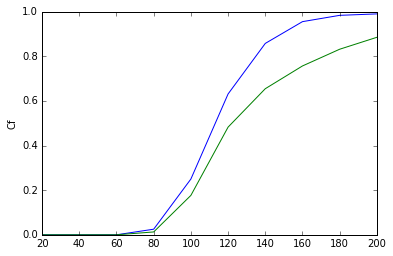

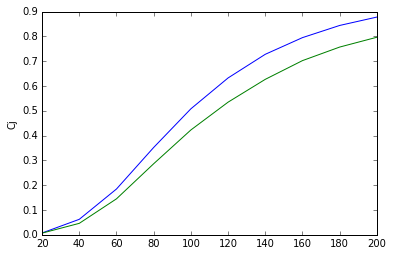

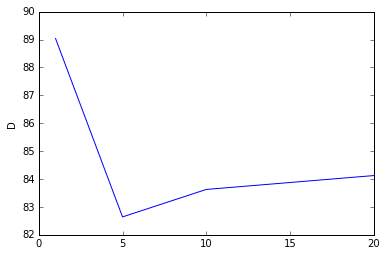

(0.0, 0.0) nan nan nan
(0.0, 0.15) 82.1309612787 80.2989239123 88.1126271419
(0.05, 0.15) 82.0582554023 80.5850162809 87.926424957
(0.05, 0.3) 86.1988532914 86.2090143492 89.3732146124
[nan, 82.130961278681994, 82.058255402320896, 86.198853291362497]
[nan, 80.298923912255916, 80.585016280861353, 86.209014349159759]
[nan, 88.112627141885412, 87.926424956970322, 89.37321461238632]


In [79]:
selected_error = 'seq_success_ratio_f'
errors_best, errors_best_avg = get_errors(error_tuples, selected_error, [True], [True], [(0.05, 0.15)], [5] )
errors_base, erros_base_avg = get_errors(error_tuples, selected_error, [False], [False], [(0.0, 0.0)], [1] )
plt.plot(Cth, np.array([errors_best_avg, erros_base_avg]).T )
plt.ylabel('Cf')
plt.show()

selected_error = 'seq_success_ratio_j'
errors_best, errors_best_avg = get_errors(error_tuples, selected_error, [True], [True], [(0.05, 0.15)], [5] )
errors_base, erros_base_avg = get_errors(error_tuples, selected_error, [False], [False], [(0.0, 0.0)], [1] )
plt.plot(Cth, np.array([errors_best_avg, erros_base_avg]).T )
plt.ylabel('Cj')
plt.show()

selected_error = 'seq_dist_corr'
errors_prt_avg = []
for p in Np:
    _,cur_avg = get_errors(error_tuples, selected_error, None, None, None, [p] )
    errors_prt_avg.append(cur_avg[0])
plt.plot(Np, np.array(errors_prt_avg))
plt.ylabel('D')
plt.show()
#print errors_prt_avg

selected_error = 'seq_dist_corr'
errors_ransac_avg_all = []
errors_ransac_avg_oh = []
errors_ransac_avg_notoh = []
for r in R:
    _,cur_avg = get_errors(error_tuples, selected_error, None, None, [r], [5,10,20] )
    errors_ransac_avg_all.append(cur_avg[0])
    _,cur_avg = get_errors(error_tuples, selected_error, [True], [True], [r], [5,10,20] )
    errors_ransac_avg_oh.append(cur_avg[0])
    _,cur_avg = get_errors(error_tuples, selected_error, [False], [False], [r], [5,10,20] )
    errors_ransac_avg_notoh.append(cur_avg[0])
    print r, errors_ransac_avg_all[-1], errors_ransac_avg_oh[-1], errors_ransac_avg_notoh[-1]
print errors_ransac_avg_all
print errors_ransac_avg_oh
print errors_ransac_avg_notoh

In [30]:
# Print average error for each parameter set.
for t in error_tuples[selected_error][selected_error_number]:
    p = t[0]
    print 'particles:', p['n_particles'], 'ransac:', p['ransac'], \
    'filter(o/h):', p['filter_occluded'], p['filter_history'], t[1], t[2], len(t[3])

particles: 5 ransac: [0.05, 0.15] filter(o/h): False True 74.5166169797 21.8035249441 110
particles: 5 ransac: [0.0, 0.15] filter(o/h): False True 75.2593135418 22.3625771119 110
particles: 5 ransac: [0.05, 0.15] filter(o/h): True True 77.2898990192 20.0937003043 110
particles: 5 ransac: [0.0, 0.15] filter(o/h): True True 77.3959777111 20.1144906201 110
particles: 10 ransac: [0.05, 0.15] filter(o/h): False True 78.1664078133 17.941159041 110
particles: 10 ransac: [0.0, 0.15] filter(o/h): False True 78.2474132831 17.9525733645 110
particles: 20 ransac: [0.05, 0.15] filter(o/h): False True 79.9666973222 16.1504533429 110
particles: 20 ransac: [0.0, 0.15] filter(o/h): False True 80.2507400902 16.4932723329 110
particles: 10 ransac: [0.05, 0.15] filter(o/h): True True 81.2236209689 18.148215175 110
particles: 10 ransac: [0.0, 0.15] filter(o/h): True True 81.3320653896 18.4921804584 110
particles: 5 ransac: [0.05, 0.15] filter(o/h): True False 81.5734744794 27.2934581763 110
particles: 10 r

In [31]:
print 'baselines:'
cur_errors = []
for t in baselines:
    p = t[0]
    cur_errors.append(t[1])
    print 'particles:', p['n_particles'], 'ransac:', p['ransac'], \
    'filter(o/h):', p['filter_occluded'], p['filter_history'], t[1], t[2], len(t[3])
print 'baselines average error:', np.average(cur_errors)

baselines:
particles: 1 ransac: [0.0, 0.0] filter(o/h): False False 89.0343468959 38.0313332319 110
baselines average error: 89.0343468959


In [32]:
def accumulate_errors(error_res, msg):
    cur_errors = {}
    for n, dd in error_res.items():
        cur_errors[n] = []
        for d in dd: cur_errors[n] += d[3]

    for n,e in cur_errors.items():
        print msg, 'average error:', n, np.average(e), len(e)
    return cur_errors
    

accumulate_errors(filter_o, 'FilterOccluded')
accumulate_errors(filter_h, 'FilterHistory')
accumulate_errors(filter_oh, 'FilterOccludedHistory')
accumulate_errors(particles_res, 'Particles')
accumulate_errors(ransac_res, 'Ransac')


FilterOccluded average error: False 84.0754882525 1980
FilterOccluded average error: True 82.8502917474 1979
FilterHistory average error: False 85.9050532511 1979
FilterHistory average error: True 81.0222695577 1980
FilterOccludedHistory average error: (False, True) 79.6802209346 990
FilterOccludedHistory average error: (True, False) 83.3367566928 989
FilterOccludedHistory average error: (False, False) 88.4707555704 990
FilterOccludedHistory average error: (True, True) 82.3643181808 990
Particles average error: 1 89.0343468959 110
Particles average error: 10 83.6254731088 1319
Particles average error: 20 84.122684166 1320
Particles average error: 5 82.6410999837 1320
Ransac average error: (0.05, 0.15) 87.926424957 330
Ransac average error: (0.0, 0.0) 89.0343468959 110
Ransac average error: (0.0, 0.15) 88.1126271419 330
Ransac average error: (0.05, 0.3) 89.3732146124 330


{(0.0, 0.0): [97.18731397609716,
  97.94950404849234,
  59.721593566969325,
  81.6391381401244,
  66.75988120282693,
  59.721593566969325,
  63.43566843646799,
  131.44685457479085,
  177.19026143813917,
  84.11280739829802,
  81.94678497328005,
  132.45025627079707,
  62.81302546703459,
  91.58725854031503,
  187.74614005484509,
  66.75988120282693,
  91.58725854031503,
  68.08852330524778,
  58.92214450553899,
  77.17595472981061,
  63.43566843646799,
  131.44685457479085,
  42.11462425504618,
  97.18731397609716,
  131.44685457479085,
  81.6391381401244,
  68.08852330524778,
  59.721593566969325,
  81.94678497328005,
  59.721593566969325,
  58.92214450553899,
  68.08852330524778,
  81.6391381401244,
  62.81302546703459,
  82.77316255504661,
  84.11280739829802,
  42.11462425504618,
  55.8414476837275,
  62.81302546703459,
  187.74614005484509,
  42.812538415279626,
  91.58725854031503,
  187.74614005484509,
  77.17595472981061,
  132.45025627079707,
  55.8414476837275,
  81.63913814

In [91]:
print error_tuples['seq_success_ratio_f'][0].__class__




<type 'list'>
